In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

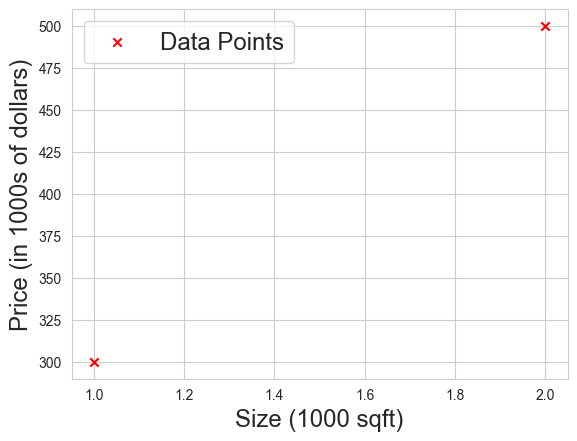

In [72]:


X_train = np.array([[1.0], [2.0]], dtype=np.float32)           #(size in 1000 square feet)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)       #(price in 1000s of dollars)

fig, ax = plt.subplots(1,1)
ax.scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
ax.legend( fontsize='xx-large')
ax.set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
ax.set_xlabel('Size (1000 sqft)', fontsize='xx-large')
plt.show()



In [8]:
linear_layer = tf.keras.layers.Dense(units=1, activation = 'linear', )

In [9]:
linear_layer.get_weights()


[]

In [10]:
a1 = linear_layer(X_train[0].reshape(1,1))
a1

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-1.4489446]], dtype=float32)>

In [11]:
w, b  = linear_layer.get_weights()
print(w, b)

[[-1.4489446]] [0.]


In [12]:
set_w =  np.array([[200]])
set_b = np.array([100])

linear_layer.set_weights([set_w,set_b])
linear_layer.get_weights()

[array([[200.]], dtype=float32), array([100.], dtype=float32)]

In [13]:


a1 = linear_layer(X_train[0].reshape(1,1))
print("activation: ",a1)
alin = np.dot(set_w,X_train[0].reshape(1,1)) + set_b
print(alin)
#They produce the same values! Now, we can use our linear layer to make predictions on our training data.


activation:  tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


[[1.]
 [2.]]
tf.Tensor(
[[300.]
 [500.]], shape=(2, 1), dtype=float32)
[[-2.5]
 [-0.5]]


Text(0.5, 1.0, 'Tensorflow prediction')

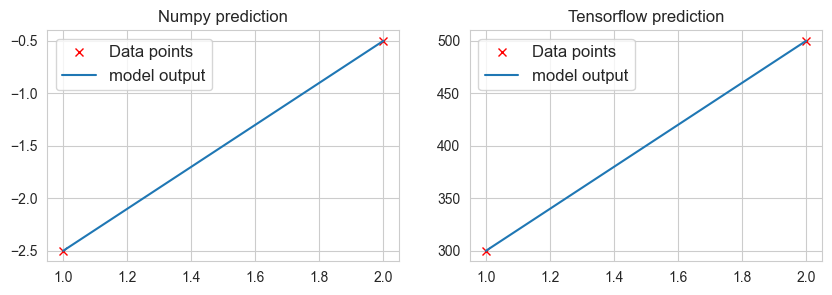

In [73]:
predict = linear_layer(X_train)
# print(X_train)
predict_np= np.dot(X_train,set_w)+ set_b
# print(predict)
# print(predict_np)

#numpy model output and tensorflow model output are the same
fig, ax = plt.subplots(1,2,figsize=(10,3))
ax[0].plot(X_train,predict_np,'x',color='r',label='Data points')# scatter plot
ax[0].plot(X_train,predict_np,label = "model output")
ax[0].legend(fontsize='large')
ax[0].set_title('Numpy prediction')

ax[1].plot(X_train,predict,'x',color='r',label='Data points')# scatter plot
ax[1].plot(X_train,predict,label = "model output")
ax[1].legend(fontsize='large')
ax[1].set_title('Tensorflow prediction')



In [75]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
# making x and y a column vector

In [76]:


pos = Y_train == 1 #boolean array of 2-D matrix(column vector)
neg = Y_train == 0 #boolean array of 2-D matrix(column vector)
X_train[pos]


array([3., 4., 5.], dtype=float32)

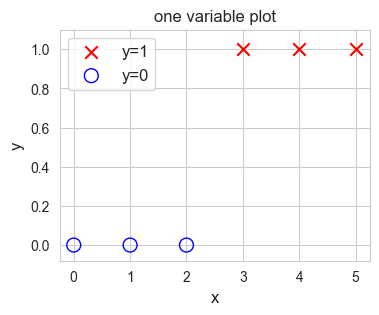

In [77]:
fig,ax = plt.subplots(1,1,figsize=(4,3))
ax.scatter(X_train[pos], Y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", facecolors='none', edgecolors='blue',
            linewidth=1)    

ax.set_ylim(-0.08,1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('one variable plot')
ax.legend(fontsize=12)
plt.show()

In [78]:


model = Sequential(
    [
        tf.keras.layers.Dense(1, input_dim=1,  activation = 'sigmoid', name='L1')
    ]
)



In [79]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [80]:
logistic_layer = model.get_layer('L1')
w,b = logistic_layer.get_weights()
print(w,b)  
print("w shape: ", w.shape) 
print("b shape: ", b.shape)

[[-1.525032]] [0.]
w shape:  (1, 1)
b shape:  (1,)


In [81]:
set_w = np.array([[2]])
set_b = np.array([-4.5])
# set_weights takes a list of numpy arrays
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())




[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [85]:


a1 = model.predict(X_train[0].reshape(1,1))
print(a1)
alog = 1/(1+np.exp(-(np.dot(set_w,X_train[0].reshape(1,1)) + set_b)))
print(alog)

# They produce the same values! 
#Now, we can use our logistic layer and NumPy model to make predictions on our training data.
# print(X_train[0].reshape(1,1))


1/1 [==============================] - 0s 25ms/step
[[0.01098694]]
[[0.01098694]]
[[0.]]


[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]] [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]]
1/1 [==============================] - 0s 26ms/step


Text(0.5, 1.0, 'Tensorflow prediction')

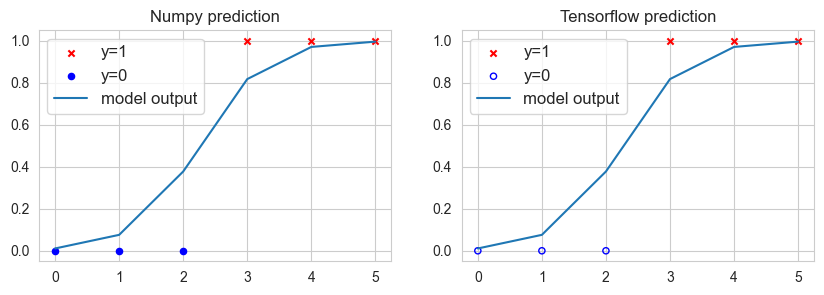

In [121]:
fig, ax = plt.subplots(1,2,figsize=(10,3))
print(X_train,Y_train)
def num_model(x):
    return 1/(1+np.exp(-(np.dot(set_w,x.reshape(1,1)) + set_b)))[0]
predict_log_np = list(map(num_model,X_train))
# print(predict_log_np[0][0])
ax[0].scatter(X_train[pos],Y_train[pos],label='y=1',marker='x',s=20,c='r')# scatter plot
ax[0].scatter(X_train[neg],Y_train[neg],label='y=0',marker='o',s=20,c='b')# scatter plot

ax[0].plot(X_train,predict_log_np,label = "model output")
ax[0].legend(fontsize='large')
ax[0].set_title('Numpy prediction')

ax[1].scatter(X_train[pos],Y_train[pos],label='y=1',marker='x',s=20,c='r')# scatter plot
ax[1].scatter(X_train[neg],Y_train[neg],label='y=0',marker='o',s=20,c='b')# scatter plot
ax[1].plot(X_train,model.predict(X_train),label = "model output")
ax[1].legend(fontsize='large')
ax[1].set_title('Tensorflow prediction')
